# Аналитика статистики рейсов авиакомпании визуальными средствами Python
Изучив базу данных и спарсив данные о крупных фестивалях из открытых источников, проанализировать влияние фестивалей на спрос пассажиров на рейсы в города, где они проходят.

### Оглавление:
- Импорт файлов
- Предобработка данных
- [Визуальный анализ](#2)
        -модели самолетов и количество рейсов
        -города и количество рейсов
        -топ-10 городов по количеству рейсов;
- [Выводы](#3)

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_models=pd.read_csv('datasets/query_1.csv')
df_flights=pd.read_csv('datasets/query_3.csv')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [16]:
df_models.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


<b>Вывод: </b>
Данные по названиям моделелей приведены к типу object (или строка), информация по количествам рейсов целочисленного типа Int64. Пропусков нет, дополнительных преобразований не требуется.

In [37]:
df_flights.info()
df_flights.describe()
df_flights['city'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


0

<b>Вывод: </b>
- Распределение количества полетов по городам скошено вправо. 
- Пропусков нет, названия городов типа Object, среднее количество полетов типа float64. 
- Дублированных значений нет. 
- Дополнительных преобразований с данными не требуется.

<div class="alert alert-block alert-success">
<b>Успех:</b> Выводы верны, первый шаг сделан отлично!
</div>

## Mодели самолетов и количество рейсов <a class="anchor" id="2"></a>

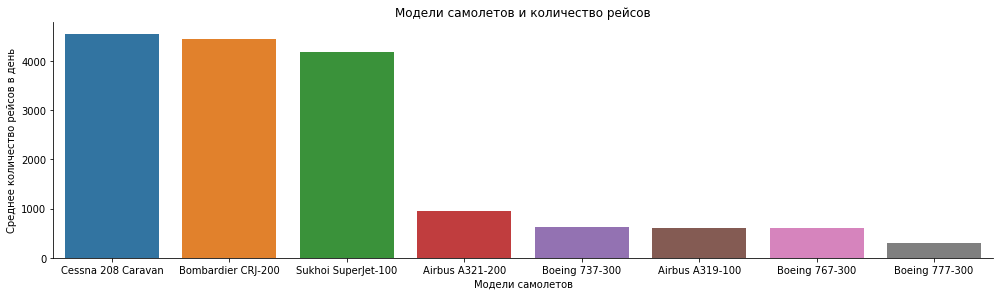

In [97]:
df_models.sort_values(by='flights_amount', ascending=False, inplace=True)
sns.catplot(kind='bar', data=df_models, x='model', y='flights_amount', height=4, aspect=3.5).set(title="Mодели самолетов и количество рейсов", xlabel='Модели самолетов', ylabel='Среднее количество рейсов в день')

<b>Вывод:</b>
- Лидерами по количеству рейсов являются модели самолетов Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi Superjet-100. Вероятно эти самолеты используются чаще для перевозок средней дальности.
- Airbus и Boeing имеют несколько ходовых моделей, однако количество рейсов в сими ниже чем у лидеров. Вероятно эти самолеты используются чаще для дальних перевозок, количество которых меньше.


<div class="alert alert-block alert-success">
<b>Успех:</b> Основные закономерности отражены в выводах. График получился отличным. Особенно хорошо, что оси и сам график подписаны! Продолжай в том же духе!
</div>

## Города и количество рейсов

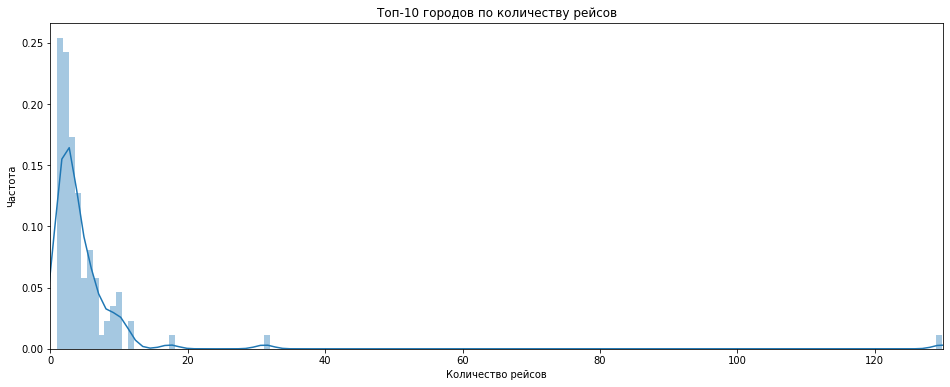

In [120]:
plt.figure(figsize=(16, 6))
plt.xlim([0,130])
sns.distplot(df_flights['average_flights'], bins=150).set(title='Tоп-10 городов по количеству рейсов', xlabel='Количество рейсов', ylabel='Частота');
#df_flights.plot(kind='hist', title='Количество рейсов по городам',  figsize=(20,5), range=(0,40), bins=100)


 <b>Вывод:</b>
 - в большинстве городов случается до 10 рейсов в день
 - от 10 до 129 рейсов в день происходит лишь в некоторых городах, являющихся крупными транспортными хабами
 

<div class="alert alert-block alert-info">
<b>Совет: </b> Как мне кажется, в данном случае более подходящим является "ящик с усами".
</div>

## Топ-10 городов и количество рейсов <a class="anchor" id="2"></a>

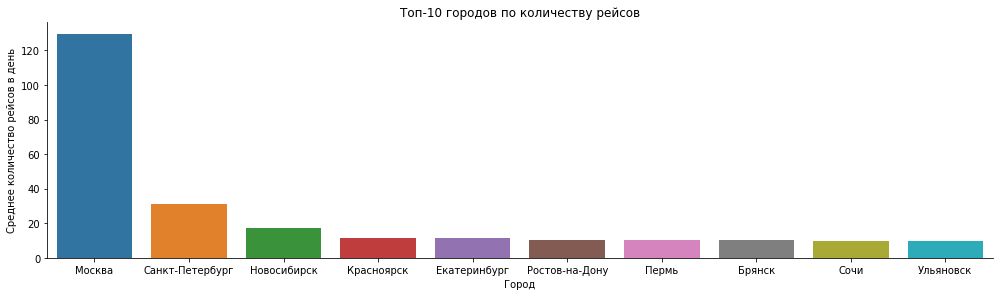

In [81]:
df_flights.sort_values(by='average_flights', ascending=False, inplace=True)
df_top10_cities=df_flights.head(10)
sns.catplot(kind='bar', data=df_top10_cities, x='city', y='average_flights', height=4, aspect=3.5).set(title='Tоп-10 городов по количеству рейсов', xlabel='Город', ylabel='Среднее количество рейсов в день')

 <b>Вывод:</b>
- Москваз - лидер по количеству авиарейсов с большим отрывом от остальных городов. В среднем ежедневно в Москву прилетают 129 рейсов
- Второе место по количеству рейсов - Санкт-Перебург, третье - Новосимирск. Затем остальные города-миллионники.

### Общие выводы <a class="anchor" id="3"></a>

1) Мы исследовали основные модели самолетов, совершающие авиаперелеты и выявили, что самые известные "на слуху" моледи самолетов Airbus и Boeing не вошли в топ-3 нашей выборки. 

2) Распределение  количества рейсов по городам показало, что в большинстве городов в среднем совершается до 10 рейсов в день

3) Посмотрели города с самым большим количеством рейсов. Лидером, ожидаемо, оказалась Москва. Остальные города миллионники отстают с большим отрывом.

4) Ранее мы  проанализировали спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. Гипотезу о зависимости количества перелетов в город от проведения фестиваля в этом городе ни подтвердить, ни отвергнуть  не удалось. Значимого отличия в количестве билетов между периодом фестиваля и обычными днями выборка не показала.

5) Похоже пользователи чаше всего предпочитают летать из небольших городов в Москву на средне-дальние расстояния.

